In [940]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [941]:
#Loading the data
divorce = pd.read_csv(r'/Users/clementngatia/Downloads/Divorce&Contraception/NSFG_2022_2023_FemRespPUFData.csv',)
divorce.head()

,CaseID,RSCRAGE,RSCRNINF,RSCRHISP,RSCRRACE,FTFMODE,DEVICE_TYPE,AGE_R,AGESCRN,HISP,...,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,CMFIVYR,YEAR,QUARTER,PHASE1,PHASE2,PHASE3
0,96064,29,5,5,3,2,Mobile,29,29,5,...,1474,1441,1429,1417,1426,2,4,1,0,0
1,96066,18,5,1,4,2,PC,18,18,1,...,1471,1441,1429,1417,1423,2,2,1,1,1
2,96068,37,1,5,2,2,Mobile,37,37,5,...,1473,1441,1429,1417,1425,2,4,1,0,0
3,96071,40,1,5,3,2,PC,40,40,5,...,1468,1441,1429,1417,1420,2,2,1,0,0
4,96072,49,1,5,2,2,PC,49,49,5,...,1466,1441,1429,1417,1418,2,1,1,1,0


In [942]:
#Checking the number of values.
divorce.size

10680432

In [943]:
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586 entries, 0 to 5585
Columns: 1912 entries, CaseID to PHASE3
dtypes: float64(1741), int64(170), object(1)
memory usage: 81.5+ MB


In [944]:
#Finding all the columns that have years listed.

columns_to_exclude = ['WHMARHX_Y_1', 'ENDMARRX_Y_1']
columns_in_range = []

for col in divorce.columns:
    # Filter the column to find values within the range [1972, 9999]
    if pd.to_numeric(divorce[col], errors='coerce').between(1972, 9999).any():
        columns_in_range.append(col)

# Print the columns that contain values in the range 1972-9999
print("Columns with values between 1972 and 2023:", columns_in_range)

Columns with values between 1972 and 2023: ['EARNHS_Y', 'MYSCHOL_Y', 'EARNBA_Y', 'FMARRDATE_Y', 'STRTCFSP_Y', 'CMSTRTFWP', 'WHMARHX_Y_1', 'STRTOGHX_Y_1', 'ENDMARRX_Y_1', 'WNSTPHX_Y_1', 'WHMARHX_Y_2', 'STRTOGHX_Y_2', 'ENDMARRX_Y_2', 'WNSTPHX_Y_2', 'WHMARHX_Y_3', 'STRTOGHX_Y_3', 'ENDMARRX_Y_3', 'WNSTPHX_Y_3', 'WHMARHX_Y_4', 'STRTOGHX_Y_4', 'ENDMARRX_Y_4', 'WNSTPHX_Y_4', 'WHMARHX_Y_5', 'STRTOGHX_Y_5', 'WNSTPHX_Y_5', 'CMMARRCH', 'WNSTRTCP_Y', 'STRTOTH1_Y', 'STPTOGC1_Y', 'LSTSEXFP_Y', 'CMLSEXFP', 'CMFPLAST', 'P1YLSEX_Y', 'CMLSEX1', 'P1YLSEX_Y2', 'CMLSEX2', 'P1YLSEX_Y3', 'CMLSEX3', 'P1YFSEX_Y', 'CMFSEX', 'CMFSEXTOT', 'P1YFSEX_Y2', 'CMFSEX2', 'CMFSEXTOT2', 'P1YFSEX_Y3', 'CMFSEX3', 'CMFSEXTOT3', 'TUBSDATE_Y', 'HYSTDATE_Y', 'VASDATE_Y', 'DATRVSTB_Y', 'DATRVVEX_Y', 'WNFSTUSE_Y', 'CMFIRSM', 'CMFSTUSE', 'DATBEGIN_Y', 'CMDATBEGIN', 'COVVAX_Y', 'CMCOVVAX', 'DATEND1', 'DATEND2', 'DATEND3', 'DATEND4', 'DATEND5', 'DATEND6', 'DATEND7', 'DATEND8', 'DATEND9', 'DATEND10', 'DATEND11', 'DATEND12', 'DATEND13'

In [945]:
#Dropping all other columns apart from those excluded
#ENDMARRX_Y_1 - Year when marriage to first husband ended.
#WHMARHX_Y_1 - Year when marriage to first husband started.

columns_to_drop = [col for col in columns_in_range if col not in columns_to_exclude]
divorce.drop(columns=columns_to_drop, inplace=True)

In [946]:
#checking how many columns we have managed to reduce.
divorce.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586 entries, 0 to 5585
Columns: 1816 entries, CaseID to PHASE3
dtypes: float64(1645), int64(170), object(1)
memory usage: 77.4+ MB


The number of features has now decreased from 1912 to 1816

In [947]:
#since we want to review only people who have ever been married, we will drop those who have never been married.
# dropping EVRMARRY = 0
evr_married = divorce[divorce['EVRMARRY'] != 0]
evr_married.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2562 entries, 3 to 5583
Columns: 1816 entries, CaseID to PHASE3
dtypes: float64(1645), int64(170), object(1)
memory usage: 35.5+ MB


This has dropped the number of respondents from 5586 to 2562 but the features still remain 1816.

In [948]:
evr_married.ENDMARRX_Y_1.isna().sum()

np.int64(1910)

In [949]:
#We now consider those who have ever been married and divorced/separated by looking at the values of first husband.
evr_married.loc[:, 'MAREND01'] = evr_married['MAREND01'].fillna(0)
evr_married.MAREND01.unique()

array([0., 1., 2., 3.])

There are now no nulls in the marriage status to 1st husband. It's either still married=0, divorced = 1, separated=2 widowed or others.

In [950]:
#retaining only the married and divorced data to use later on in modelling.
div_still_married = evr_married.loc[(evr_married.MAREND01 == 0) | (evr_married.MAREND01== 1)]
div_still_married.MAREND01.unique()

array([0., 1.])

Retaining the still married and once ever divorced respondents dropped the separated, widowed and other respondents.

From 2562 to 2450 respondents.

In [951]:
#creating a feature (duration of marriage) from year of marriage to first husband and year of end of marriage to first husband.
div_still_married

,CaseID,RSCRAGE,RSCRNINF,RSCRHISP,RSCRRACE,FTFMODE,DEVICE_TYPE,AGE_R,AGESCRN,HISP,...,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,CMFIVYR,YEAR,QUARTER,PHASE1,PHASE2,PHASE3
3,96071,40,1,5,3,2,PC,40,40,5,...,1468,1441,1429,1417,1420,2,2,1,0,0
4,96072,49,1,5,2,2,PC,49,49,5,...,1466,1441,1429,1417,1418,2,1,1,1,0
8,96081,44,5,5,3,2,Mobile,44,44,5,...,1471,1441,1429,1417,1423,2,2,1,1,1
9,96082,44,1,5,3,2,Mobile,44,44,5,...,1469,1441,1429,1417,1421,2,2,1,1,0
11,96086,47,5,5,3,2,PC,47,46,5,...,1471,1441,1429,1417,1423,2,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,105990,43,1,5,1,2,Mobile,43,43,5,...,1468,1441,1429,1417,1420,2,2,1,0,0
5574,105991,41,5,1,4,2,Mobile,41,41,1,...,1476,1441,1429,1417,1428,2,4,1,1,1
5579,106002,37,1,5,2,2,Mobile,37,37,5,...,1476,1441,1429,1417,1428,2,4,1,1,1
5582,106010,46,5,5,3,1,Not applicable,46,46,5,...,1467,1441,1429,1417,1419,2,1,1,1,1


## FEATURE SELECTION

In [952]:

#let's remove the columns that explicitly deal with any other statuses.
#These are: LMARSTAT - legal marital status
# FMARIT - Formal marital status,
# FMARITAL - Formal marital status,
# RMARITAL - informal marital status
# PREVHUSB - previous husbands,
# FMARNO - number of times married to man
# HSBVERIF - current husbands name
# MANREL - Is current partner husband or cohabitting partner
# MARSTAT - marital or cohabitting status

#Also removing 'DEVICE_TYPE' since the values are string rather than numeric.

#Removing details to do with current partner since it will skew the results towards those currently marrued.
# PCURRNT1 - 
# CURRPRTS /CURRPRTT- no of sexual partners.
# PARTDUR1 - Number of months between first and most recent sexual intercourse with most recent sexual partne


In [953]:
div_still_married.drop(columns=['LMARSTAT','FMARIT','RMARIT', 'FMARITAL','RMARITAL','PREVHUSB','FMARNO',
                                'HSBVERIF','MANREL','MARSTAT', 'DEVICE_TYPE','PCURRNT1','CURRPRTS','CURRPRTT','PARTDUR1' ], 
                       inplace=True)
div_still_married.shape

/var/folders/tr/7nczqy6957313cq459kdk1ch0000gn/T/ipykernel_92112/3753680959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  div_still_married.drop(columns=['LMARSTAT','FMARIT','RMARIT', 'FMARITAL','RMARITAL','PREVHUSB','FMARNO',


(2450, 1801)

In [954]:
#Removing all imputed flags that end in _I
div_still_married = div_still_married.loc[:, ~div_still_married.columns.str.endswith('_I')]
div_still_married.shape

(2450, 1725)

In [955]:
#dropping the columns that are entirely null by ensuring that the sum of those that are not null is greater than 2/3 the remaining respondents
div_features = div_still_married.loc[:, div_still_married.notnull().sum() > (2562/1.5)]
div_features.shape

(2450, 639)

We have now come down from 1805 to 639 columns that are not null in more than 2/3 of the entries.

In [956]:
#importing the necessary libraries for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import linear_model

In [957]:
div_features_copy = div_features.copy()
div_features_copy

,CaseID,RSCRAGE,RSCRNINF,RSCRHISP,RSCRRACE,FTFMODE,AGE_R,AGESCRN,HISP,ROSCNT,...,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,CMFIVYR,YEAR,QUARTER,PHASE1,PHASE2,PHASE3
3,96071,40,1,5,3,2,40,40,5,4,...,1468,1441,1429,1417,1420,2,2,1,0,0
4,96072,49,1,5,2,2,49,49,5,2,...,1466,1441,1429,1417,1418,2,1,1,1,0
8,96081,44,5,5,3,2,44,44,5,2,...,1471,1441,1429,1417,1423,2,2,1,1,1
9,96082,44,1,5,3,2,44,44,5,2,...,1469,1441,1429,1417,1421,2,2,1,1,0
11,96086,47,5,5,3,2,47,46,5,4,...,1471,1441,1429,1417,1423,2,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,105990,43,1,5,1,2,43,43,5,7,...,1468,1441,1429,1417,1420,2,2,1,0,0
5574,105991,41,5,1,4,2,41,41,1,4,...,1476,1441,1429,1417,1428,2,4,1,1,1
5579,106002,37,1,5,2,2,37,37,5,5,...,1476,1441,1429,1417,1428,2,4,1,1,1
5582,106010,46,5,5,3,1,46,46,5,3,...,1467,1441,1429,1417,1419,2,1,1,1,1


In [958]:
#Dropping the target column
X = div_features.drop('MAREND01', axis=1) 
y = div_features['MAREND01']

In [959]:
import numpy as np

# Compute correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of the correlation matrix without the diagonal 1s
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop correlated features
X_reduced = X.drop(to_drop, axis=1)

In [960]:
X_reduced.shape

(2450, 365)

In [961]:
#libraries to deal with null values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [962]:
#Since some of the critical columns may have null values, we will fill them using nearest neighbor imputer
imputer = KNNImputer(n_neighbors=5)
X_fill = pd.DataFrame(imputer.fit_transform(X_reduced), columns=X_reduced.columns)

In [963]:
#confirming that all null values have been imputed using the nearest neighbors imputer.
missing_percentage = X_fill.isnull().mean() * 100
print((missing_percentage>0).sum())

0


I tried the relational iterative imputer based on relationship between variables but the computing time was great and it exited with a warning.

Now that the missing values have been handled, we can proceed to modelling.

In [964]:
#Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X_fill, y, test_size=0.2, random_state=42)

In [965]:
#standardizing the both the test and train X
scaler = StandardScaler()
standardized_X_train = scaler.fit_transform(X_train)
standardized_X_test = scaler.transform(X_test)

#### Starting with logistic regression

In [966]:
#applying the logistic regression model with Lasso regularization to shrink the coefficient of less important features.
logreg = LogisticRegression(penalty='l1', 
        C=1.0, 
        solver='liblinear', 
        random_state=42)
#fitting the model
logreg.fit(standardized_X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [967]:
#predicting the model
y_pred = logreg.predict(standardized_X_test)

In [968]:
#printing out the classification report.
print('Lasso and liblinear\n', classification_report(y_test, y_pred))

Lasso and liblinear
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       355
         1.0       0.79      0.78      0.78       135

    accuracy                           0.88       490
   macro avg       0.85      0.85      0.85       490
weighted avg       0.88      0.88      0.88       490



There accuracy of the model is at 0.87 which means the model is quite accurate

[[327  28]
 [ 30 105]]


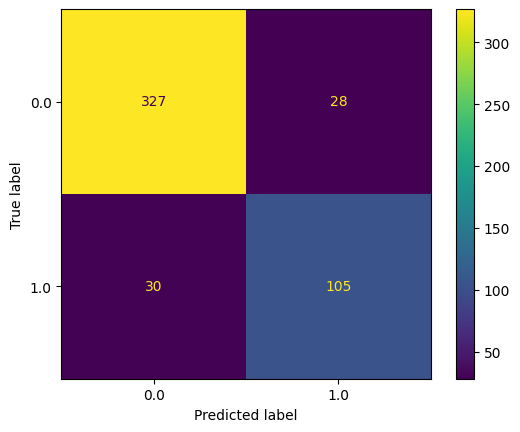

In [969]:
#evaluating the model using a confusion matrix of the y_pred
print(confusion_matrix(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = [0.0, 1.0])
cm_display.plot()
plt.show()

In [970]:
#looking at the distribution of Y
print(y.value_counts(normalize=True))

MAREND01
0.0    0.742449
1.0    0.257551
Name: proportion, dtype: float64


From the distribution, we can see that 74% or the target variable are still married while 26% are divorced.

In [971]:
#prediction probabilities
probabilities = logreg.predict_proba(standardized_X_test)  # Output: Probabilities for both classes
print("Predicted Probabilities:\n", probabilities)

Predicted Probabilities:
 [[6.08663910e-01 3.91336090e-01]
 [9.94029442e-01 5.97055821e-03]
 [9.78593451e-01 2.14065487e-02]
 [1.16528508e-02 9.88347149e-01]
 [9.90420628e-01 9.57937245e-03]
 [5.55253516e-01 4.44746484e-01]
 [2.61946278e-02 9.73805372e-01]
 [9.99330584e-01 6.69415784e-04]
 [9.99989531e-01 1.04694378e-05]
 [9.79950483e-01 2.00495175e-02]
 [3.62859567e-01 6.37140433e-01]
 [8.91481439e-01 1.08518561e-01]
 [6.00631567e-01 3.99368433e-01]
 [9.92337069e-01 7.66293068e-03]
 [2.91472450e-01 7.08527550e-01]
 [1.22180057e-03 9.98778199e-01]
 [5.10941646e-02 9.48905835e-01]
 [9.89061660e-01 1.09383396e-02]
 [9.84701449e-01 1.52985511e-02]
 [1.65773482e-01 8.34226518e-01]
 [9.35914825e-01 6.40851753e-02]
 [6.78646202e-01 3.21353798e-01]
 [8.71156635e-01 1.28843365e-01]
 [9.40574298e-01 5.94257024e-02]
 [9.99834926e-01 1.65073944e-04]
 [9.83411530e-01 1.65884699e-02]
 [9.99999824e-01 1.76421424e-07]
 [9.99999027e-01 9.72582624e-07]
 [9.96742170e-01 3.25783020e-03]
 [1.93772220e-03 

In [972]:
#Identifying Feature Importance using co-efficients

feature_names = X_train.columns

coefficients = logreg.coef_[0]
importance_log = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)
}).sort_values(by='Importance', ascending=False)

print(importance_log[:20])

      Feature  Coefficient  Importance
325  FMAR1AGE    -1.986953    1.986953
1     RSCRAGE     1.888695    1.888695
6      ROSCNT    -1.549103    1.549103
326  mar1diss    -1.340942    1.340942
312  HHKIDTYP    -1.290399    1.290399
173  NUMSVC12     1.077501    1.077501
324     CEBOW     1.038655    1.038655
45   ONLYTBVS     1.011405    1.011405
311  HHFAMTYP     0.992181    0.992181
313   CSPBSHH     0.966842    0.966842
40   P1YRELP1     0.934404    0.934404
327  mar1bir1    -0.920038    0.920038
314  CSPOKDHH     0.817704    0.817704
44   ANYVASEC    -0.783598    0.783598
20     BIRTH1     0.716619    0.716619
102    SALMX2    -0.687218    0.687218
41   EVERTUBS    -0.673579    0.673579
336    sex3mo     0.655439    0.655439
10   SSMARCOH     0.654838    0.654838
144    SAYX22    -0.649707    0.649707


In [973]:
#Finding the intercept
intercept = logreg.intercept_[0]  
print(f"Intercept (β0): {intercept}")

Intercept (β0): -3.1827524754627583


### Feature selection using Random Forest Classifier

In [974]:
X_train, X_test, y_train, y_test = train_test_split(X_fill, y, test_size=0.2, random_state=42)

In [975]:
# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [976]:
y_pred_rf = rf_model.predict(X_test)

In [977]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       355
         1.0       0.95      0.79      0.86       135

    accuracy                           0.93       490
   macro avg       0.94      0.89      0.91       490
weighted avg       0.93      0.93      0.93       490



The classification report from the Random Forest classifier performed slightly better than the logistic regression

[[350   5]
 [ 29 106]]


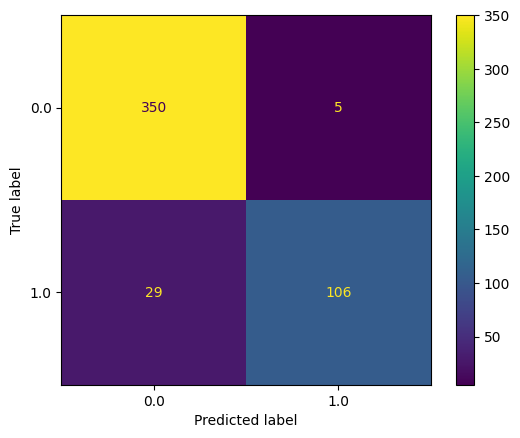

In [988]:
#evaluating the model using a confusion matrix of the y_pred
print(confusion_matrix(y_test,y_pred_rf))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels = [0.0, 1.0])
cm_display.plot()
plt.show()

In [994]:
# Get feature importances
feature_importance_rf = pd.DataFrame({
    'Feature_rf': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance_rf[:20])

      Feature_rf  Importance
40      P1YRELP1    0.064056
311     HHFAMTYP    0.052624
27   WHMARHX_Y_1    0.052182
325     FMAR1AGE    0.025904
326     mar1diss    0.024560
339     LIFPRTNR    0.023628
348     DATEUSE1    0.023171
313      CSPBSHH    0.022866
6         ROSCNT    0.020209
237     SPLSTWK1    0.020039
257   OPPLIFENUM    0.018188
30    CHEDMARN_1    0.016586
1        RSCRAGE    0.014219
297       TOTINC    0.013221
323      AGEPRG1    0.012887
324        CEBOW    0.012086
258   OPPYEARNUM    0.011482
337     PARTS1YR    0.009998
357      POVERTY    0.008431
28    HXAGEMAR_1    0.008098


### Decision Trees Model

In [980]:
from sklearn.tree import DecisionTreeClassifier

In [981]:
X_fill.shape

(2450, 365)

In [982]:
X_train, X_test, y_train, y_test = train_test_split(X_fill, y, test_size=0.2, random_state=42)

In [983]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

In [984]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [985]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [986]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       355
         1.0       0.81      0.68      0.74       135

    accuracy                           0.87       490
   macro avg       0.85      0.81      0.83       490
weighted avg       0.87      0.87      0.87       490



In [987]:
feature_importance_dt = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance_dt[:20])

         Feature  Importance
40      P1YRELP1    0.398539
311     HHFAMTYP    0.220143
27   WHMARHX_Y_1    0.130925
326     mar1diss    0.110174
339     LIFPRTNR    0.044913
313      CSPBSHH    0.038039
336       sex3mo    0.010260
238      SPFTPTX    0.007806
254     CONDFELL    0.007776
263     MALSHT12    0.007627
149       SAYX28    0.007167
242       BMIcat    0.007013
327     mar1bir1    0.005893
250      BINGE12    0.003725
236       RFTPTX    0.000000
241     GENHEALT    0.000000
231     ATTNDNOW    0.000000
244     TELLWGHT    0.000000
232       MILSVC    0.000000
243      DRWEIGH    0.000000


[[334  21]
 [ 43  92]]


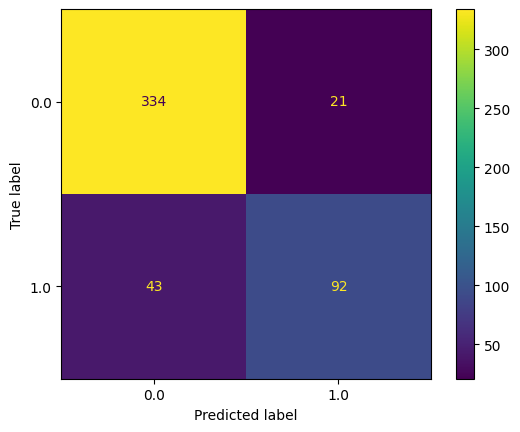

In [989]:
#evaluating the model using a confusion matrix of the y_pred
print(confusion_matrix(y_test,y_pred_dt))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt), display_labels = [0.0, 1.0])
cm_display.plot()
plt.show()

## Evaluating the similaries of feature importance amongst the different models


In [1000]:
print('Logistic Regression top 20 features\n',importance_log[:20])

print('Random Forest top 20 Features\n', feature_importance_rf[:20])

print('Decision Tree top 20 Features\n', feature_importance_dt[:20])

Logistic Regression top 20 features
       Feature  Coefficient  Importance
325  FMAR1AGE    -1.986953    1.986953
1     RSCRAGE     1.888695    1.888695
6      ROSCNT    -1.549103    1.549103
326  mar1diss    -1.340942    1.340942
312  HHKIDTYP    -1.290399    1.290399
173  NUMSVC12     1.077501    1.077501
324     CEBOW     1.038655    1.038655
45   ONLYTBVS     1.011405    1.011405
311  HHFAMTYP     0.992181    0.992181
313   CSPBSHH     0.966842    0.966842
40   P1YRELP1     0.934404    0.934404
327  mar1bir1    -0.920038    0.920038
314  CSPOKDHH     0.817704    0.817704
44   ANYVASEC    -0.783598    0.783598
20     BIRTH1     0.716619    0.716619
102    SALMX2    -0.687218    0.687218
41   EVERTUBS    -0.673579    0.673579
336    sex3mo     0.655439    0.655439
10   SSMARCOH     0.654838    0.654838
144    SAYX22    -0.649707    0.649707
Random Forest top 20 Features
       Feature_rf  Importance
40      P1YRELP1    0.064056
311     HHFAMTYP    0.052624
27   WHMARHX_Y_1    0.0521

In [1001]:
print("Number of features in X:", len(X.columns))
print("Length of feature_importances_:", len(dt_model.feature_importances_))

Number of features in X: 638
Length of feature_importances_: 365


The number of features that are considered important are 365, down from 638

In [1013]:
# Display the new DataFrame with only the importance of contraception use features
feature_contraception = feature_importance_rf[feature_importance_rf['Feature_rf'].isin(['EVERUSED', 'DRUGDEV','CONDOM','PILL','IUD','IMPLANT','MORNPILL','RING','PATCH',
                                                                                        'WIDRAWAL','RYTHM', 'TEMPSAFE','NATCYCA', 'DEPOPROV', 'SDAYCBDS','OTHRMETH01','ABORTION'])]


feature_contraception

,Feature_rf,Importance
54,DEPOPROV,0.002547
320,ABORTION,0.002172
62,MORNPILL,0.001931
55,WIDRAWAL,0.001843
65,OTHRMETH01,0.001708
61,RING,0.001134
57,SDAYCBDS,0.000876
63,IMPLANT,0.000859
64,IUD,0.000836
60,PATCH,0.000683


In [1009]:
#Displaying feature importance and co-efficients from logistic regression
feature_contraception_log = importance_log[importance_log['Feature'].isin(['EVERUSED', 'DRUGDEV','CONDOM','PILL','IUD','IMPLANT','MORNPILL','RING','PATCH',
                                                                                        'WIDRAWAL','RYTHM', 'TEMPSAFE','NATCYCA', 'DEPOPROV', 'SDAYCBDS','OTHRMETH01','ABORTION'])]


feature_contraception_log

,Feature,Coefficient,Importance
57,SDAYCBDS,-0.329762,0.329762
63,IMPLANT,0.289779,0.289779
64,IUD,-0.276133,0.276133
66,EVERUSED,0.249266,0.249266
53,CONDOM,-0.218327,0.218327
55,WIDRAWAL,0.213395,0.213395
58,TEMPSAFE,0.202747,0.202747
61,RING,-0.184176,0.184176
60,PATCH,-0.175430,0.175430
59,NATCYCA,-0.157967,0.157967


A positive coefficient indicates the feature increases the likelihood of class 1 (e.g., divorce).
IMPLANT, EVERUSED, WITHDRAWAL,TEMPSAFE, PILL, ARBORTION AND OTHER METHODS use indicated the likelihood of divorce.

A negative coefficient indicates the feature increases the likelihood of class 0 (e.g., marriage).
IUD, CONDOM, RING, PATCH, DEPOPROV (Injectables),MORNPILL(Emergency Contraception) were among the modern methods of contraception that were likely to decrease occurence of divorce from first husband. 


## Conclusion

Contraception and contraceptive use have very little importance on the outcomes of marriage being a little lower on the feature importance list.

## Challenges of Study

1. Divorce and Remarriage
- We could not use the current marital status of respondents because some who were ever divorced were remarried to upto their 5th husbands. 

2. Cultural application - This is a US 2022-2023 study. The cultural dynamics are different and can therefore not be applied to a Kenyan context.

3. Early Onset of sex missing as a variable though it has been shown to affect divorce rates from existing literature.

4. Contraception data is on a basis of ever-used not necessarily on current use or use during marriage( for those divorced). Though there are variables on continuity, they are not as well mapped.